In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print('Shape of Training Data:',train.shape,'Shape of Testing Data',test.shape)

Shape of Training Data: (891, 12) Shape of Testing Data (418, 11)


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train1=train.copy()
test1=test.copy()

train1.drop(columns=['PassengerId','Ticket','Cabin'],inplace=True)
test1.drop(columns=['PassengerId','Ticket','Cabin'],inplace=True)

In [9]:
train1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [10]:
def gettitle(name):
    str1=name.split(',')[1]
    str2=str1.split('.')[0]
    str3=str2.strip()
    return str3

for data in [train1,test1]:
    for i in range(data.shape[0]):
        data.Name[i]=gettitle(data.Name[i])

train1.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


In [ ]:
test1.head()

In [11]:
train1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
test1.isna().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [13]:
train1.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

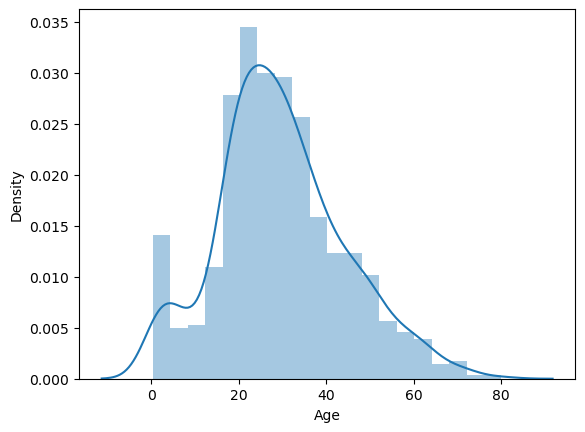

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(train1.Age)
plt.show()

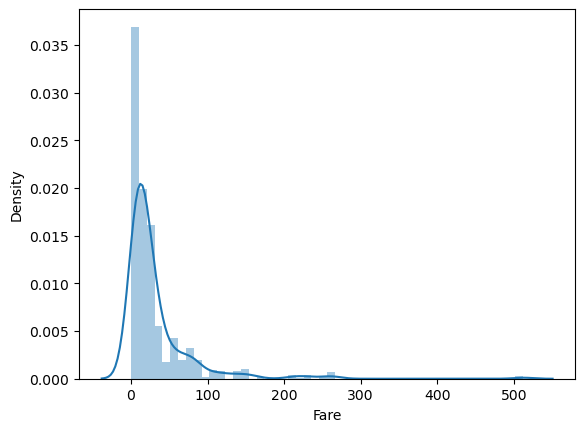

In [15]:
sns.distplot(train1.Fare)
plt.show()

In [16]:
train2=train1.copy()
test2=test1.copy()

train2.Embarked.fillna('S',inplace=True)
train2.Age.fillna(train2.Age.median(),inplace=True)

test2.Age.fillna(train2.Age.median(),inplace=True)
test2.Fare.fillna(train2.Fare.mean(),inplace=True)



Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
train2.duplicated().sum()

109

In [18]:
train2.drop_duplicates(inplace=True)
train2.duplicated().sum()

0

In [20]:
train2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


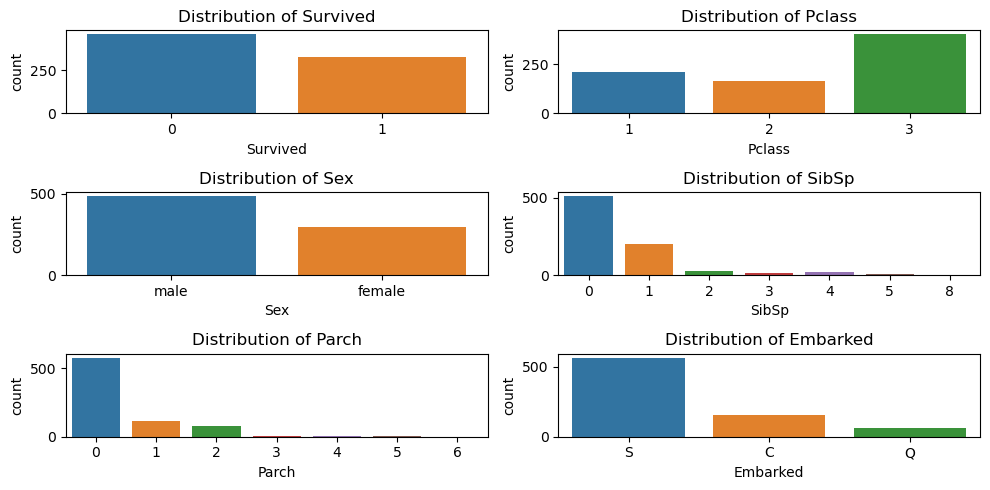

In [30]:
plt.figure(figsize=(10,5))
n=0
for col in ["Survived",'Pclass','Sex','SibSp','Parch','Embarked']:
    n+=1
    plt.subplot(3,2,n)
    sns.countplot(x = train2[col])
    plt.title(f'Distribution of {col}')
plt.tight_layout()

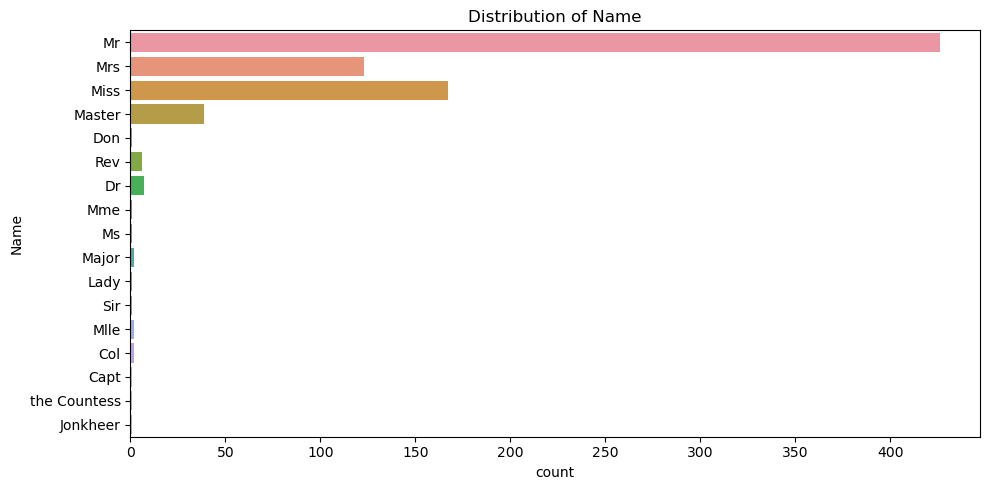

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(y=train2.Name)
plt.title('Distribution of Name')
plt.tight_layout()

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 782, dtype: object